# Airline(preprocessing)

## import libs

In [1]:
import pandas as pd 
import numpy as np 
from dython.nominal import associations

In [2]:
df = pd.read_csv('Airline_edite.csv')
df

,Airline,month(2019),Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,March,Banglore,New Delhi,BLR → DEL,22,170,0,No info,3897
1,Air India,May,Kolkata,Banglore,CCU → IXR → BBI → BLR,5,445,2,No info,7662
2,Jet Airways,June,Delhi,Cochin,DEL → LKO → BOM → COK,9,1140,2,No info,13882
3,IndiGo,May,Kolkata,Banglore,CCU → NAG → BLR,18,325,1,No info,6218
4,IndiGo,March,Banglore,New Delhi,BLR → NAG → DEL,16,285,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...
10455,Air Asia,April,Kolkata,Banglore,CCU → BLR,19,150,0,No info,4107
10456,Air India,April,Kolkata,Banglore,CCU → BLR,20,155,0,No info,4145
10457,Jet Airways,April,Banglore,Delhi,BLR → DEL,8,180,0,No info,7229
10458,Vistara,March,Banglore,New Delhi,BLR → DEL,11,160,0,No info,12648


In [3]:
from dython.nominal import associations

D:\anaconda\envs\AI\Lib\site-packages\dython\nominal.py:708: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
D:\anaconda\envs\AI\Lib\site-packages\dython\nominal.py:709: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


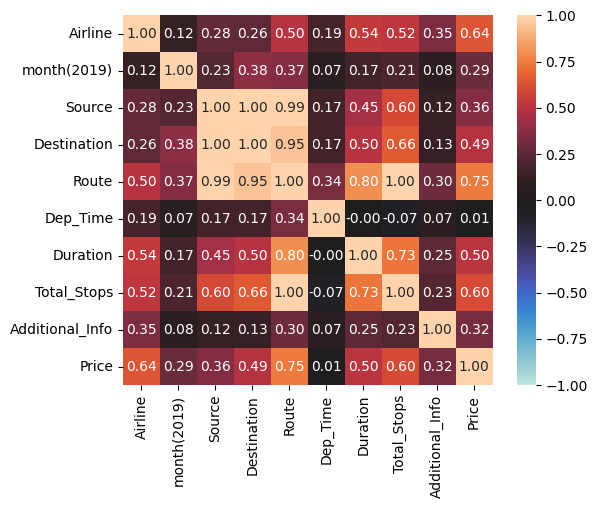

In [4]:
x = associations(df , filename="test.png" )

## we have columns need to some changes

### Airline

In [5]:
df['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               477
Air Asia                              318
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [6]:
lines_drop = []
for i in df['Airline'].unique().tolist():
    if df['Airline'].value_counts()[i] < 100 :
        lines_drop.append(i)
    else :
        pass
lines_drop

['Vistara Premium economy',
 'Jet Airways Business',
 'Multiple carriers Premium economy',
 'Trujet']

In [7]:
df.drop(df[df['Airline'].isin(lines_drop)].index.to_list() , axis = 0 , inplace = True)
df.reset_index(drop = True , inplace = True)
df

,Airline,month(2019),Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,March,Banglore,New Delhi,BLR → DEL,22,170,0,No info,3897
1,Air India,May,Kolkata,Banglore,CCU → IXR → BBI → BLR,5,445,2,No info,7662
2,Jet Airways,June,Delhi,Cochin,DEL → LKO → BOM → COK,9,1140,2,No info,13882
3,IndiGo,May,Kolkata,Banglore,CCU → NAG → BLR,18,325,1,No info,6218
4,IndiGo,March,Banglore,New Delhi,BLR → NAG → DEL,16,285,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...
10432,Air Asia,April,Kolkata,Banglore,CCU → BLR,19,150,0,No info,4107
10433,Air India,April,Kolkata,Banglore,CCU → BLR,20,155,0,No info,4145
10434,Jet Airways,April,Banglore,Delhi,BLR → DEL,8,180,0,No info,7229
10435,Vistara,March,Banglore,New Delhi,BLR → DEL,11,160,0,No info,12648


### Route

In [8]:
df['Route'].value_counts().head(50)

Route
DEL → BOM → COK                2363
BLR → DEL                      1532
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
CCU → DEL → BLR                 565
BLR → BOM → DEL                 399
MAA → CCU                       380
DEL → HYD → COK                 326
DEL → BLR → COK                 232
DEL → COK                       213
DEL → JAI → BOM → COK           183
DEL → MAA → COK                 146
DEL → AMD → BOM → COK           144
DEL → IDR → BOM → COK            90
DEL → HYD → MAA → COK            83
CCU → MAA → BLR                  65
CCU → HYD → BLR                  53
CCU → BBI → BLR                  50
DEL → BHO → BOM → COK            48
CCU → IXR → DEL → BLR            46
DEL → HYD → BOM → COK            45
DEL → NAG → BOM → COK            44
DEL → CCU → BOM → COK            44
DEL → GOI → BOM → COK            44
DEL → PNQ → COK                  42
CCU → BBI → BOM → BLR            42
DEL → LKO → BOM → COK 

In [9]:
route_drop = []
for i in df['Route'].unique().tolist():
    if df['Route'].value_counts()[i]<30:
        route_drop.append(i)
    else :
        pass

In [10]:
df[df['Route'].isin(route_drop)]

,Airline,month(2019),Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price
1,Air India,May,Kolkata,Banglore,CCU → IXR → BBI → BLR,5,445,2,No info,7662
3,IndiGo,May,Kolkata,Banglore,CCU → NAG → BLR,18,325,1,No info,6218
4,IndiGo,March,Banglore,New Delhi,BLR → NAG → DEL,16,285,1,No info,13302
21,Air India,March,Banglore,New Delhi,BLR → COK → DEL,22,920,1,No info,6955
26,IndiGo,June,Delhi,Cochin,DEL → LKO → COK,21,345,1,No info,8238
...,...,...,...,...,...,...,...,...,...,...
10385,SpiceJet,May,Kolkata,Banglore,CCU → IXB → BLR,15,330,1,No info,8224
10395,Air India,June,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,5,2280,3,No info,10493
10398,Air India,May,Kolkata,Banglore,CCU → JAI → BOM → BLR,8,1610,2,No info,11222
10408,Air India,March,Delhi,Cochin,DEL → TRV → COK,5,1535,1,No info,9790


In [11]:
df.drop(df[df['Route'].isin(route_drop)].index.to_list() , axis=0 ,inplace = True)
df.reset_index(drop = True , inplace=True)
df

,Airline,month(2019),Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,March,Banglore,New Delhi,BLR → DEL,22,170,0,No info,3897
1,Jet Airways,June,Delhi,Cochin,DEL → LKO → BOM → COK,9,1140,2,No info,13882
2,SpiceJet,June,Kolkata,Banglore,CCU → BLR,9,145,0,No info,3873
3,Jet Airways,March,Banglore,New Delhi,BLR → BOM → DEL,18,930,1,In-flight meal not included,11087
4,Jet Airways,March,Banglore,New Delhi,BLR → BOM → DEL,8,1265,1,No info,22270
...,...,...,...,...,...,...,...,...,...,...
9793,Air Asia,April,Kolkata,Banglore,CCU → BLR,19,150,0,No info,4107
9794,Air India,April,Kolkata,Banglore,CCU → BLR,20,155,0,No info,4145
9795,Jet Airways,April,Banglore,Delhi,BLR → DEL,8,180,0,No info,7229
9796,Vistara,March,Banglore,New Delhi,BLR → DEL,11,160,0,No info,12648


In [12]:
len(route_drop)

92

### Additional info

In [13]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         7574
In-flight meal not included     1888
No check-in baggage included     318
1 Long layover                    14
No Info                            3
Red-eye flight                     1
Name: count, dtype: int64

In [14]:
df.drop(df[df['Additional_Info'].isin(['1 Long layover','No Info','Red-eye flight'])].index.to_list(),axis=0,inplace = True)
df.reset_index(inplace = True , drop=True)
df

,Airline,month(2019),Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,March,Banglore,New Delhi,BLR → DEL,22,170,0,No info,3897
1,Jet Airways,June,Delhi,Cochin,DEL → LKO → BOM → COK,9,1140,2,No info,13882
2,SpiceJet,June,Kolkata,Banglore,CCU → BLR,9,145,0,No info,3873
3,Jet Airways,March,Banglore,New Delhi,BLR → BOM → DEL,18,930,1,In-flight meal not included,11087
4,Jet Airways,March,Banglore,New Delhi,BLR → BOM → DEL,8,1265,1,No info,22270
...,...,...,...,...,...,...,...,...,...,...
9775,Air Asia,April,Kolkata,Banglore,CCU → BLR,19,150,0,No info,4107
9776,Air India,April,Kolkata,Banglore,CCU → BLR,20,155,0,No info,4145
9777,Jet Airways,April,Banglore,Delhi,BLR → DEL,8,180,0,No info,7229
9778,Vistara,March,Banglore,New Delhi,BLR → DEL,11,160,0,No info,12648


## Drop unusefull columns

In [15]:
df.drop(['Dep_Time'] , axis = 1 , inplace = True)
df

,Airline,month(2019),Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,March,Banglore,New Delhi,BLR → DEL,170,0,No info,3897
1,Jet Airways,June,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882
2,SpiceJet,June,Kolkata,Banglore,CCU → BLR,145,0,No info,3873
3,Jet Airways,March,Banglore,New Delhi,BLR → BOM → DEL,930,1,In-flight meal not included,11087
4,Jet Airways,March,Banglore,New Delhi,BLR → BOM → DEL,1265,1,No info,22270
...,...,...,...,...,...,...,...,...,...
9775,Air Asia,April,Kolkata,Banglore,CCU → BLR,150,0,No info,4107
9776,Air India,April,Kolkata,Banglore,CCU → BLR,155,0,No info,4145
9777,Jet Airways,April,Banglore,Delhi,BLR → DEL,180,0,No info,7229
9778,Vistara,March,Banglore,New Delhi,BLR → DEL,160,0,No info,12648


In [16]:
df.to_csv('Airline.csv',index=False)